In [2]:
from mozo import my_train_test_split, train_and_submit, merge_with_features, from_ln_pln_trans_to_predict, num_to_range_categories, my_train_test_split, save_model, stratified_sample

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
#%matplotlib inline

import math

import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth', None)


from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from functools import partial
import xgboost as xgb
import lightgbm as lgb
import catboost as ctb
from sklearn.svm import SVC

from sklearn.metrics import r2_score, f1_score, mean_absolute_error, mean_squared_error

from scikitplot.estimators import plot_learning_curve

import time
from datetime import datetime
from threading import Timer

import xgbfir


In [2]:
import pandas as pd
train = pd.read_hdf('~/pml7/module3/input/train.car_price.h5')
test = pd.read_hdf('~/pml7/module3/input/test.car_price.h5') #zbiór testowy bez odpowiedzi

In [3]:
train, test = merge_with_features('ft_price_test.csv', train, test)

train, test = merge_with_features('ft_created_at_unix_train.csv', train, test)
train, test = merge_with_features('ft_latitude_longitude_train.csv', train, test)

train, test = merge_with_features('ft_new_param_test.csv', train, test)
train, test = merge_with_features('ft_new_param_2_encoded_train.csv', train, test)
train, test = merge_with_features('ft_new_param_3_encoded_train.csv', train, test)

train, test = merge_with_features('ft_range_param_encoded_train.csv', train, test)

train, test = merge_with_features('ft_mca_test.csv', train, test)
train, test = merge_with_features('ft_pca_train.csv', train, test)


train
Index(['car_id', 'pln_to_eur', 'price_value_pln',
       'price_value_pln_log_transl'],
      dtype='object')
test
Index(['car_id', 'pln_to_eur'], dtype='object')
train
Index(['car_id', 'created_at_unix', 'created_at_unix_na_mean'], dtype='object')
test
Index(['car_id', 'created_at_unix', 'created_at_unix_na_mean'], dtype='object')
train
Index(['car_id', 'latitude', 'latitude_na_mean', 'longitude',
       'longitude_na_mean'],
      dtype='object')
test
Index(['car_id', 'latitude', 'latitude_na_mean', 'longitude',
       'longitude_na_mean'],
      dtype='object')
train
Index(['car_id', 'new_param_rok-produkcji',
       'new_param_rok_produkcji_minus_aktualny_rok',
       'new_param_pierwsza-rejestracja-date', 'new_param_przebieg',
       'new_param_moc', 'new_param_pojemność-skokowa',
       'new_param_liczba-drzwi', 'new_param_liczba-miejsc',
       'new_param_serwisowany-w-aso', 'new_param_pierwszy-właściciel',
       'new_param_bezwypadkowy', 'new_param_zarejestrowany-w-polsc

train
Index(['car_id', 'encoded_seller_type', 'encoded_seller_name',
       'encoded_seller_address', 'encoded_new_param_marka_pojazdu',
       'new_param_marka-pojazdu', 'encoded_new_param_model_pojazdu',
       'new_param_model', 'encoded_new_param_wersja_pojazdu',
       'new_param_wersja', 'encoded_new_param_kod_silnika',
       'new_param_kod-silnika'],
      dtype='object')
test
Index(['car_id', 'encoded_seller_type', 'encoded_seller_name',
       'encoded_seller_address', 'encoded_new_param_marka_pojazdu',
       'new_param_marka-pojazdu', 'encoded_new_param_model_pojazdu',
       'new_param_model', 'encoded_new_param_wersja_pojazdu',
       'new_param_wersja', 'encoded_new_param_kod_silnika',
       'new_param_kod-silnika'],
      dtype='object')
train
Index(['car_id', 'range_new_param_rok_produkcji_cat',
       'encoded_range_new_param_rok_produkcji_cat',
       'range_new_param_przebieg_cat', 'encoded_range_new_param_przebieg_cat',
       'range_new_param_moc_cat', 'encoded_r

In [17]:
train, test = merge_with_features('ft_new_param_4_train.csv', train, test)


train
Index(['car_id', 'seller_wojewodzctwo', 'encoded_seller_wojewodzctwo',
       'percent_range_seller_wojewodzctwo'],
      dtype='object')
test
Index(['car_id', 'seller_wojewodzctwo', 'encoded_seller_wojewodzctwo',
       'percent_range_seller_wojewodzctwo'],
      dtype='object')


In [ ]:
test

In [18]:
train.to_hdf('output/newest_train.car_price.h5', 'data') 
test.to_hdf('output/newest_test.car_price.h5', 'data') 

/home/m.mozolewski_3736/.local/lib/python3.7/site-packages/pandas/core/generic.py:2449: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block3_values] [items->Index(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'seller_address', 'seller_name', 'seller_type', 'param_liczba-miejsc',
       'param_uszkodzony', 'param_marka-pojazdu', 'param_model',
       'param_engine-code', 'param_liczba-drzwi', 'param_first-registration',
       'param_country-of-origin', 'param_pierwsza-rejestracja',
       'param_gearbox', 'param_przebieg', 'param_faktura-vat',
       'param_rok-produkcji', 'param_vin', 'param_perłowy',
       'param_homologacja-ciężarowa', 'param_service-record', 'param_metallic',
       'param_leasing-concession', 'param_color', 'param_financing-option',
       'param_original-owner', 'param_vat-marża', 'param_kategoria',
       'param_co2-emissions', 'par

In [3]:
train = pd.read_hdf('output/newest_train.car_price.h5')
test = pd.read_hdf('output/newest_test.car_price.h5') #zbiór testowy bez odpowiedzi

# pomysly:
- startyfikacja
- waznosc cech
- zapomiane zmienne jak: EUR/PLN, Mazowieckie, 
- encodowanie -1 braków - zamiast sredniej, zera
- z bonusu waznosc kombijacji cech
- kombinacje na featurach
- kombinacje na innych
- hiper tuning
- w xgboost metryka uczenia log
- bread ???
- sztuczne zmienne jak trend ?

# Stratyfikacja:
- 

In [4]:
#train_30['car_id'].to_csv('output/split_train_30.csv', index=False) 
train_30 = pd.read_csv('~/pml7/konkurs/output/split_train_30.csv')
train_30

,car_id
0,65450
1,142125
2,56196
3,135963
4,29491
...,...
31947,81607
31948,109409
31949,159270
31950,84860


# modele - próby

feats = test.select_dtypes(include=[np.number, np.bool]).columns
feats = feats[ feats != 'car_id' ].values
feats

In [5]:
train['encoded_price_currency'] = train.apply(lambda row: 1 if row['price_currency'] == 'PLN' else 1, axis=1)
test['encoded_price_currency'] = test.apply(lambda row: 1 if row['price_currency'] == 'PLN' else 1, axis=1)

In [13]:
from scipy import stats
#, 'new_param_rok-produkcji'
train = train[(np.abs(stats.zscore(train[['price_value_pln']])) < 3).all(axis=1)]
train

,breadcrumb,created_at,price_currency,price_details,price_value,seller_address,seller_name,seller_type,feature_czujniki-parkowania-przednie,feature_poduszka-powietrzna-chroniąca-kolana,...,pca_34,pca_35,pca_36,pca_37,pca_38,pca_39,seller_wojewodzctwo,encoded_seller_wojewodzctwo,percent_range_seller_wojewodzctwo,encoded_price_currency
0,"[Osobowe, Dacia, Logan, Dacia Logan II (2012-)]","13:23, 5 marca 2018",PLN,Cena Brutto,45100.0,"Krasne 7A - 36-007 Krasne, rzeszowski, Podkarpackie (Polska)",AUTO SPEKTRUM,Dealer,False,False,...,-0.160528,-0.904321,0.137447,-1.102236,0.729488,-1.734558,Podkarpackie,5105,0,1
1,"[Osobowe, Peugeot, 3008, Peugeot 3008 I (2009-2016)]","15:48, 5 marca 2018",PLN,"Cena Brutto, Do negocjacji, Faktura VAT",28000.0,"Tomaszów Mazowiecki, tomaszowski, Łódzkie",None,Osoba prywatna,False,False,...,-0.357192,-0.357860,-0.034951,0.235858,0.404226,0.232392,Łódzkie,9698,20,1
2,"[Osobowe, Porsche, Cayenne, Porsche Cayenne II (2010-)]","06:30, 4 marca 2018",PLN,"Cena Netto, Do negocjacji, Faktura VAT",229500.0,"Kępińska 24a - 63-640 Bralin, kępiński, Wielkopolskie (Polska)",P.W. GRIB,Dealer,True,True,...,-1.162093,-1.232023,-0.190102,-0.012744,-0.679334,-1.121476,Wielkopolskie,22125,80,1
3,"[Osobowe, Peugeot, 308, Peugeot 308 T7 (2008-2013)]","08:46, 3 marca 2018",PLN,"Cena Brutto, Do negocjacji",19500.0,"Limanowa, limanowski, Małopolskie",None,Osoba prywatna,False,False,...,-0.306688,0.645044,0.564442,0.936159,-0.683544,0.953539,Małopolskie,12155,40,1
4,"[Osobowe, Volkswagen, Golf, Volkswagen Golf VII (2012-)]","20:00, 3 marca 2018",PLN,"Cena Brutto, Faktura VAT",164900.0,"Niciarniana 51/53 - 92-320 Łódź, Śródmieście (Polska)",KROTOSKI-CICHY Niciarniana 51/53 oraz Dąbrowskiego 216 ŁÓDŹ SAMOCHODY UŻYWANE,Dealer,True,True,...,-0.804734,1.036269,1.002536,-0.144132,0.281657,1.213276,Łódzkie,9698,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106489,"[Osobowe, Hyundai, i20, Hyundai i20 I (2008-2014)]","15:12, 27 lutego 2018",PLN,"Cena Netto, Faktura VAT",17900.0,"ul.Gliwicka 102 - 42-600 Tarnowskie Góry, tarnogórski, Śląskie (Polska)",Auto Salon DZIUK Dealer Krajowych Samochodów Używanych.,Dealer,False,False,...,-0.167565,0.014478,0.101903,-0.697908,-0.726597,0.669276,Śląskie,16155,60,1
106490,"[Osobowe, Škoda, RAPID]","16:23, 22 lutego 2018",PLN,"Cena Netto, Faktura VAT",22700.0,"Modlińska 253b - 03-120 Warszawa, Mazowieckie (Polska)",TIV-AUTO Modlińska253b SALON BEZWYPADKOWYCH WYSELEKCJONOWANYCH AUT Z POLSKICH SALONÓW,Dealer,False,False,...,-0.820938,0.537874,0.246734,-0.588296,-0.348942,0.948676,Mazowieckie,22620,100,1
106491,"[Osobowe, Opel, Zafira, Opel Zafira B (2005-2011)]","21:12, 3 marca 2018",PLN,"Cena Brutto, Do negocjacji",15500.0,"Rzeszów, Podkarpackie",None,Osoba prywatna,False,True,...,-0.187558,-0.017138,0.375780,-0.814700,-0.780178,-0.579240,Podkarpackie,5105,0,1
106492,"[Osobowe, Volkswagen, Passat, Volkswagen Passat B5 FL (2000-2005)]","16:10, 28 lutego 2018",PLN,"Cena Brutto, Do negocjacji",6490.0,"Katowicka 112 - 41-705 Ruda Śląska, Śląskie (Polska)",Auto Komis,Dealer,True,False,...,-0.913937,0.178838,-0.876254,0.505079,-1.202285,0.505833,Śląskie,16155,60,1


In [14]:
vars_main = [ 'encoded_price_currency',
             #'created_at_unix_na_mean', 
             #'latitude_na_mean', 'longitude_na_mean', 
             'new_param_rok-produkcji', 
             #'new_param_rok_produkcji_minus_aktualny_rok', 
             #'new_param_pierwsza-rejestracja-date',
             'new_param_przebieg', 'new_param_moc', 'new_param_pojemność-skokowa', 
             'new_param_liczba-drzwi', 'new_param_liczba-miejsc',
           ]

vars_features = [col for col in train if col.startswith('feature_')]

vars_bool_params = ['new_param_serwisowany-w-aso', 'new_param_pierwszy-właściciel', 'new_param_bezwypadkowy',
                'new_param_zarejestrowany-w-polsce',# 'new_param_uszkodzony', 
                'new_param_możliwość-finansowania','new_param_leasing-concession',
                #'new_param_filtr-cząstek-stałych',
                'new_param_metalik', 'new_param_perłowy', 'new_param_akryl-(niemetalizowany)'
                   ]

vars_new_params_2 = [
    'encoded_new_param_typ', #'new_param_typ', 
              
    'encoded_new_param_kraj_pochodzenia', #'new_param_kraj_pochodzenia_2', 
    #'new_param_kraj_pochodzenia_Polska', 'new_param_kraj_pochodzenia_Niemcy', 'new_param_kraj_pochodzenia_Francja',     'new_param_kraj_pochodzenia_Belgia', 'new_param_kraj_pochodzenia_Szwajcaria', 'new_param_kraj_pochodzenia_Holandia',     'new_param_kraj_pochodzenia_Stany_Zjednoczone', 'new_param_kraj_pochodzenia_Włochy', 'new_param_kraj_pochodzenia_Austria',     'new_param_kraj_pochodzenia_Wielka_Brytania', 'new_param_kraj_pochodzenia_Dania', 'new_param_kraj_pochodzenia_Szwecja',     'new_param_kraj_pochodzenia_Luksemburg', 'new_param_kraj_pochodzenia_Kanada', 'new_param_kraj_pochodzenia_Czechy',      'new_param_kraj_pochodzenia_Hiszpania', 
    #'new_param_kraj_pochodzenia_Inny',
    
    'encoded_new_param_rodzaj_paliwa', #'new_param_rodzaj_paliwa_2',
    #'new_param_rodzaj_paliwa_Diesel', 'new_param_rodzaj_paliwa_Benzyna', 'new_param_rodzaj_paliwa_Benzyna_LPG',     'new_param_rodzaj_paliwa_Benzyna_CNG', 'new_param_rodzaj_paliwa_Hybryda', 'new_param_rodzaj_paliwa_Elektryczny',
    
    'encoded_new_param_skrzynia_biegów', #'new_param_skrzynia_biegów_2',  
    #'new_param_skrzynia_biegów_Manualna', 'new_param_skrzynia_biegów_Półautomatyczna', 'new_param_skrzynia_biegów_Automatyczna_hydrauliczna',     'new_param_skrzynia_biegów_Automatyczna_dwusprzęgłowa', 'new_param_skrzynia_biegów_Automatyczna_bezstopniowa',
    
    'encoded_new_param_napęd', #'new_param_napęd_2', 
    #'new_param_napęd_Na_przednie_koła', 'new_param_napęd_4x4_stały', 'new_param_napęd_4x4_dołączany_automatycznie',     'new_param_napęd_4x4_dołączany_ręcznie', 'new_param_napęd_Na_tylne_koła', 
              
    'encoded_new_param_kolor', #'new_param_kolor_2', 
    #'new_param_kolor_Beżowy',  'new_param_kolor_Biały',  'new_param_kolor_Bordowy',  'new_param_kolor_Brązowy',  'new_param_kolor_Czarny',  'new_param_kolor_Czerwony',  'new_param_kolor_Fioletowy',  'new_param_kolor_Inny kolor',  'new_param_kolor_Niebieski',  'new_param_kolor_Srebrny',  'new_param_kolor_Szary',  'new_param_kolor_Zielony',  'new_param_kolor_Złoty',  'new_param_kolor_Żółty', 
]

vars_new_params_3 = [
    'encoded_seller_type', #'encoded_seller_address', 
    'encoded_seller_name', 
              
    'encoded_new_param_marka_pojazdu', #'new_param_marka-pojazdu',
    'encoded_new_param_model_pojazdu', #'new_param_model',
    'encoded_new_param_wersja_pojazdu', #'new_param_wersja',
    'encoded_new_param_kod_silnika', #'new_param_kod-silnika',
             ]

vars_bool_years = [
           'new_param_pierwsza_rejestracja_ten_rok', 'new_param_pierwsza_rejestracja_poprzedni_rok', 'new_param_pierwsza_rejestracja_2_lata', 'new_param_pierwsza_rejestracja_3_lata',
           'new_param_pierwsza_rejestracja_4_5_lat', 'new_param_pierwsza_rejestracja_6_7_lat', 'new_param_pierwsza_rejestracja_8_10_lat', 'new_param_pierwsza_rejestracja_11_15_lat', 'new_param_pierwsza_rejestracja_16_wiecej_lat',
           
           'new_param_rok-produkcji_ten_rok', 'new_param_rok-produkcji_poprzedni_rok', 'new_param_rok-produkcji_2_lata', 'new_param_rok-produkcji_3_lata',
           'new_param_rok-produkcji_4_5_lat', 'new_param_rok-produkcji_6_7_lat', 'new_param_rok-produkcji_8_10_lat', 'new_param_rok-produkcji_11_15_lat', 'new_param_rok-produkcji_16_wiecej_lat',
]

vars_new_param_4 = [
    'encoded_seller_wojewodzctwo', #'seller_wojewodzctwo', 
    #'percent_range_seller_wojewodzctwo'    
]

vars_mca = [col for col in train if col.startswith('mca_')]
vars_pca = [col for col in train if col.startswith('pca_')]


filter_col = [ 'car_id',
              *vars_main, 
              #*vars_features,  
              *vars_bool_params,
              *vars_new_params_2,
              *vars_new_params_3,
              *vars_new_param_4,
              #*vars_bool_years,
              *vars_mca,
              #*vars_pca,
             ] 


# print(train[filter_col].describe())
#print(train[filter_col].info())
#print(test[filter_col].info())
# (test[filter_col].head())

X_train, X_test, y_train, y_test = my_train_test_split(train[filter_col], train['price_value_pln_log_transl'], train_30)
#X_train, X_test, y_train, y_test = train_test_split(train[filter_col], train['price_value_pln_log_transl'], test_size=0.3)
#X_test.head()

col_model_1_9162 = [ 'car_id',
              'new_param_rok-produkcji', 'new_param_przebieg', 'new_param_moc', 'new_param_pojemność-skokowa',
              *([col for col in train if col.startswith('mca_')][0:14]),
              'new_param_pierwszy-właściciel','new_param_bezwypadkowy','new_param_zarejestrowany-w-polsce','new_param_serwisowany-w-aso','new_param_możliwość-finansowania','new_param_leasing-concession',
              'new_param_kraj_pochodzenia_Polska','new_param_kraj_pochodzenia_Niemcy','new_param_kraj_pochodzenia_Stany_Zjednoczone','new_param_kraj_pochodzenia_Wielka_Brytania','new_param_kraj_pochodzenia_Holandia',
              'new_param_rodzaj_paliwa_Benzyna_LPG','new_param_rodzaj_paliwa_Hybryda','new_param_rodzaj_paliwa_Diesel','new_param_rodzaj_paliwa_Benzyna',
              'new_param_skrzynia_biegów_Manualna','new_param_skrzynia_biegów_Automatyczna_dwusprzęgłowa','new_param_skrzynia_biegów_Automatyczna_hydrauliczna','new_param_skrzynia_biegów_Automatyczna_bezstopniowa',
             ] 
col_model_2_11720 = [ 'car_id',
'new_param_napęd_4x4_stały','new_param_napęd_4x4_dołączany_automatycznie','new_param_napęd_Na_tylne_koła','new_param_napęd_Na_przednie_koła',
'new_param_kolor_Biały', 'new_param_kolor_Czarny', 'new_param_kolor_Szary', 'new_param_kolor_Brązowy', 'new_param_kolor_Srebrny', 'new_param_kolor_Zielony', 'new_param_kolor_Niebieski', 'new_param_kolor_Inny kolor',
'encoded_seller_type','encoded_new_param_kod_silnika','encoded_new_param_wersja_pojazdu','encoded_new_param_marka_pojazdu','encoded_new_param_model_pojazdu',
               'encoded_seller_name', #'encoded_seller_address',
'new_param_rok-produkcji_poprzedni_rok','new_param_rok-produkcji_ten_rok','new_param_rok-produkcji_2_lata','new_param_rok-produkcji_3_lata','new_param_pierwsza_rejestracja_2_lata','new_param_pierwsza_rejestracja_3_lata','new_param_pierwsza_rejestracja_poprzedni_rok',
*([col for col in train if col.startswith('pca_')][0:10]),
#'new_param_filtr-cząstek-stałych',
'new_param_metalik', 'new_param_perłowy', 'new_param_akryl-(niemetalizowany)',
'new_param_liczba-drzwi', 'new_param_liczba-miejsc',
               'latitude_na_mean', 'longitude_na_mean', 
              ] 
#np.unique(col_model_1_9162 + col_model_2_11720)
X_train, X_test, y_train, y_test = my_train_test_split(train[col_model_1_9162], train['price_value_pln_log_transl'], train_30)

In [15]:
best_params =  {
    'n_estimators': 900, #879, 
    #'n_estimators': 879, 
    'learning_rate': 0.1, #0.017354274677292683, 
    #'learning_rate': 0.017354274677292683, 

    'subsample': 0.923403370465418,
    'colsample_bytree': 0.8797393544001986, 

    'max_depth': 10, #43, 
    #'max_depth': 43, 
    'min_child_weight': 100, #48, 
    #'min_child_weight': 48, 
    
    'reg_alpha': 1.1048264246167496, 
    'reg_lambda': 0.7451037079565321, 

    'random_state': 6950, 
    
}

#model = ctb.CatBoostRegressor(n_estimators=100, depth=10, random_state=3400, verbose=False)
#model = RandomForestRegressor(max_depth=10, n_estimators=150, max_features=0.8)
model = xgb.XGBRegressor(**best_params)

In [19]:
filter_col2 = ["car_id", "created_at_unix_na_mean", "latitude_na_mean", "longitude_na_mean", "new_param_rok_produkcji_minus_aktualny_rok", "new_param_pierwsza-rejestracja-date",
              "new_param_przebieg", "new_param_moc", "new_param_pojemność-skokowa", "new_param_liczba-drzwi", "new_param_liczba-miejsc", "new_param_serwisowany-w-aso", 
              "new_param_pierwszy-właściciel", "new_param_bezwypadkowy", "new_param_zarejestrowany-w-polsce", "new_param_uszkodzony", "new_param_leasing-concession", 
              "new_param_możliwość-finansowania", "new_param_filtr-cząstek-stałych", "new_param_metalik", "new_param_perłowy", "new_param_akryl-(niemetalizowany)",
              "encoded_new_param_typ", "encoded_new_param_kraj_pochodzenia", "encoded_new_param_rodzaj_paliwa", "encoded_new_param_skrzynia_bieg\u00f3w",
              "encoded_new_param_nap\u0119d", "encoded_new_param_kolor", 
              "pca_0", "pca_1", "pca_2", "pca_3", "pca_4", "pca_5", "pca_6", "pca_7", "pca_8", "pca_9", "pca_10", "pca_11", "pca_12", "pca_13", "pca_14",# "pca_15", "pca_16", "pca_17", "pca_18", "pca_19", "pca_20", "pca_21", "pca_22", "pca_23", "pca_24", "pca_25", "pca_26", "pca_27", "pca_28", "pca_29", "pca_30", "pca_31", "pca_32", "pca_33", "pca_34", "pca_35", "pca_36", "pca_37", "pca_38", "pca_39"
              ]

X_train, X_test, y_train, y_test = my_train_test_split(train[filter_col2], train['price_value_pln_log_transl'], train_30)


In [ ]:
import time
time.sleep(60*60) 
mae, r2, model = train_and_submit(X_train, X_test, y_train, y_test, train, test, model, best_params,
                     file_sufix= 'z_funkcji', opis='testuje rozne n_estimators',
                     do_plot = True, save_min=8000,
                     kaggle=True, kaggle_min=7000) 

                                                score
new_param_kraj_pochodzenia_Luksemburg        0.027033
new_param_kraj_pochodzenia_Kanada            0.079129
new_param_kraj_pochodzenia_Szwecja           0.088843
new_param_kraj_pochodzenia_Czechy            0.093043
new_param_kraj_pochodzenia_Austria           0.095410
...                                               ...
new_param_kraj_pochodzenia_Wielka_Brytania  10.921347
new_param_przebieg                          12.005352
new_param_moc                               23.313626
new_param_skrzynia_biegów_Manualna          25.233377
new_param_rok-produkcji                     74.236990

[89 rows x 1 columns]


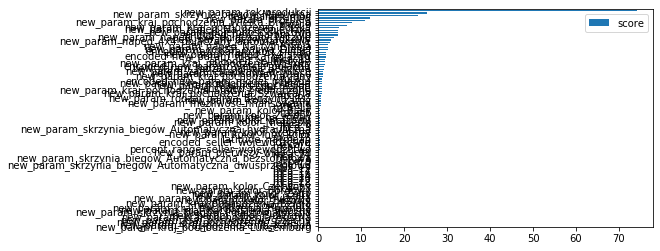

In [14]:


feature_important = model.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=True)
data.plot(kind='barh')
print(data)

In [ ]:
data.to_csv('output/ft_importance_'+datetime.now().strftime("%H:%M:%S")+'.csv', index=True)

In [7]:




save_model(name='reczna_wrzuta', train_df=train, test_df=test,used_feats=X_train.columns, my_model=model, mae=mae, r2=r2, 
               details="Lepszy model z cechami wrzucaymi wg waznosci", plot_learning_curve = None, plt_hist = None, 
               kaggle=False)


"Lepszy model z cechami wrzucaymi wg waznosci"


100%|██████████| 1.09M/1.09M [00:05<00:00, 197kB/s]


          teamName                submissionDate       score
0   Remek Półtorak  2020-10-25T18:34:10.8566667Z  5840.42499
1         Jacoslaw  2020-10-25T20:37:07.4366667Z  6247.50515
2            Marek       2020-10-23T10:08:57.53Z  6365.54102
3  Adrian Mich***i       2020-10-25T17:50:21.56Z  7044.25813
4             mozo  2020-10-25T19:46:05.6233333Z  8198.23371


xgb_rmodel = xgb.XGBRegressor(**best_params).fit(X_train, y_train)

xgbfir.saveXgbFI(xgb_rmodel, feature_names=filter_col, OutputXlsxFile='output/XgbFI__train30__1.xlsx')

pd.read_excel('output/XgbFI__train30__1.xlsx', 'Interaction Depth 0')